   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Target  
0          

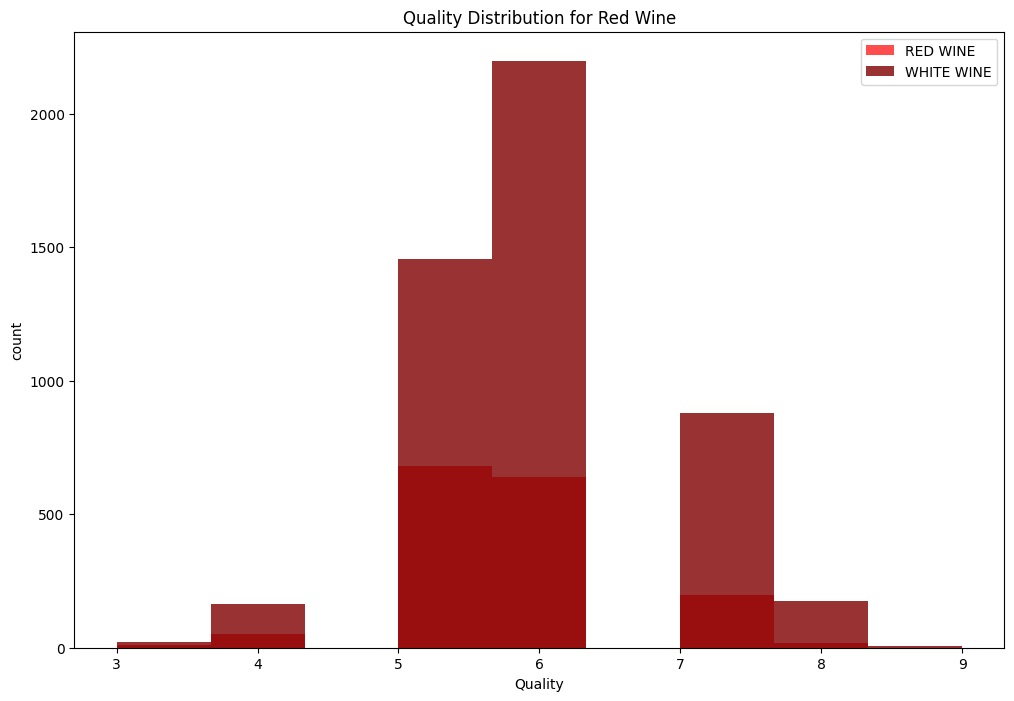

In [9]:
import pandas as pd
import numpy as np
import datasets
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine_data = load_wine()
import matplotlib.pyplot as plt
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df["Target"] = wine_data.target
print(wine_df.head())
print(wine_data.feature_names)
print(wine_data.target_names)
red_wine = datasets.load_dataset("csv",data_files="winequality-red.csv",  delimiter=";")
white_wine = datasets.load_dataset("csv", data_files="winequality-white.csv", delimiter=";")
red_wine_df = red_wine["train"].to_pandas() #convert it to pandas dataframe
white_wine_df = white_wine["train"].to_pandas()
print(red_wine_df.shape) #print the shape
print(white_wine_df.shape)
print(red_wine_df.dtypes)
print(red_wine_df.describe())

#print number of unique values
print(red_wine_df.nunique())

#check for missing values
print(red_wine_df.isnull().sum())
plt.figure(figsize=(12,8))
#find the minimum quality column between red_wine and white_Wine
min_quality = min(red_wine_df["quality"].min(), white_wine_df["quality"].min())
max_quality = max(red_wine_df["quality"].max(), white_wine_df["quality"].max())
#create an array of 10 evenly spaces values starting from min to  max
bin_space = np.linspace(min_quality, max_quality,10)
#plot hist
plt.hist(red_wine_df.quality, bins=bin_space, color="red", alpha=0.7, label="RED WINE")
plt.hist(white_wine_df.quality, bins=bin_space, color="maroon", alpha=0.8, label="WHITE WINE")
plt.xlabel("Quality")
plt.ylabel("count")
plt.title("Quality Distribution for Red Wine")
plt.legend()
plt.show()






MASTERING GRADIENT DESCENT: GUIDE TO OPTIMIZING MACHINE LEARNING MODELS

[array(16.13956216), array(15.7934667), array(15.45491909), array(15.12375474), array(14.79981262), array(14.48293522), array(14.17296848), array(13.86976168), array(13.57316739), array(13.28304142), array(12.99924268), array(12.7216332), array(12.45007799), array(12.18444503), array(11.92460515), array(11.67043201), array(11.42180203), array(11.17859433), array(10.94069065), array(10.70797531), array(10.48033517), array(10.25765955), array(10.03984016), array(9.82677112), array(9.61834881), array(9.4144719), array(9.21504127), array(9.01995993), array(8.82913305), array(8.64246784), array(8.45987353), array(8.28126135), array(8.10654445), array(7.93563789), array(7.76845856), array(7.60492517), array(7.44495822), array(7.28847993), array(7.13541421), array(6.98568663), array(6.83922441), array(6.69595633), array(6.55581272), array(6.41872544), array(6.28462785), array(6.15345474), array(6.02514234), array(5.89962824), array(5.77685144), array(5.65675222), array(5.5392722), array(5.424

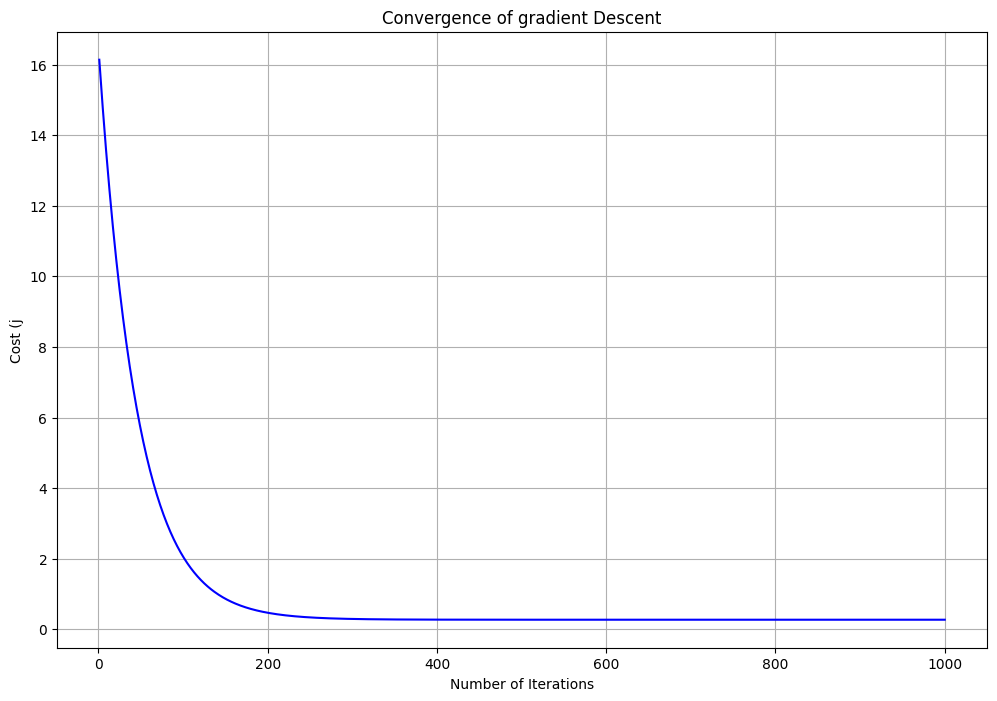

In [10]:
#optimal Path finding algorith
#minimizes model error by navigating towars the steepest descent using cost function
#Gradient Descent relies cost function and learning rate
#Cost function: Quantifies the error in predicted and expected values
#Learning Rate (alpha): Dictates the size of the steps we take downhill
#Batch gradient Descent : utilizes every data set in every step
def gradient_descent(x, y, theta, alpha, iterations):
    """x input dataset/ features
    y is the target feature
    theta is the initial parameter
    alpha is the learning rate
    iteratios is the number of times to execute the algorithm"""
    m = y.size #assigns the size of array of y
    cost_list = [] #used to store compputed cost or error values
    theta_list = [theta] #contains the initial theta values
    for i in range(iterations):
        predictions = np.dot(x, theta) #compute dot product of features x and vector theta
        error = predictions -y
        #calculate the cost or loss function using mean squared error
        cost = 1/(2*m) * np.dot(error.T, error)
        #remove single dimensional entries and add it cost
        cost_list.append(np.squeeze(cost))
        #update theta
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        theta_list.append(theta)
    return theta, theta_list, cost_list
x= pd.DataFrame(red_wine_df["alcohol"])
y = red_wine_df["quality"]

#split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

#set the initial theta paramters to zero creating a 1 d array
theta = np.zeros(x_train.shape[1]).reshape(-1,1)

#defining number of iterations
iterations = 1000
alpha = 0.0001

y_train = np.array(y_train).reshape(-1,1)
#g is final cost, theta_list, cost_list
g, theta_list, cost_list = gradient_descent(x_train, y_train, theta, alpha, iterations)
print(cost_list)
print("Final value: ", g)

#plot the graph
plt.plot(range(1, iterations +1), cost_list, color="blue")
plt.rcParams["figure.figsize"] = (12,8)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (j")
plt.title("Convergence of gradient Descent")
plt.show()


[array(0.27147808), array(0.27145685), array(0.27143608), array(0.27141577), array(0.27139591), array(0.27137648), array(0.27135748), array(0.2713389), array(0.27132072), array(0.27130294), array(0.27128555), array(0.27126855), array(0.27125191), array(0.27123564), array(0.27121973), array(0.27120417), array(0.27118895), array(0.27117406), array(0.2711595), array(0.27114525), array(0.27113133), array(0.2711177), array(0.27110438), array(0.27109134), array(0.2710786), array(0.27106613), array(0.27105394), array(0.27104201), array(0.27103035), array(0.27101894), array(0.27100778), array(0.27099686), array(0.27098619), array(0.27097575), array(0.27096554), array(0.27095555), array(0.27094578), array(0.27093623), array(0.27092689), array(0.27091775), array(0.27090881), array(0.27090007), array(0.27089152), array(0.27088315), array(0.27087497), array(0.27086697), array(0.27085915), array(0.27085149), array(0.27084401), array(0.27083669), array(0.27082953), array(0.27082252), array(0.2708156

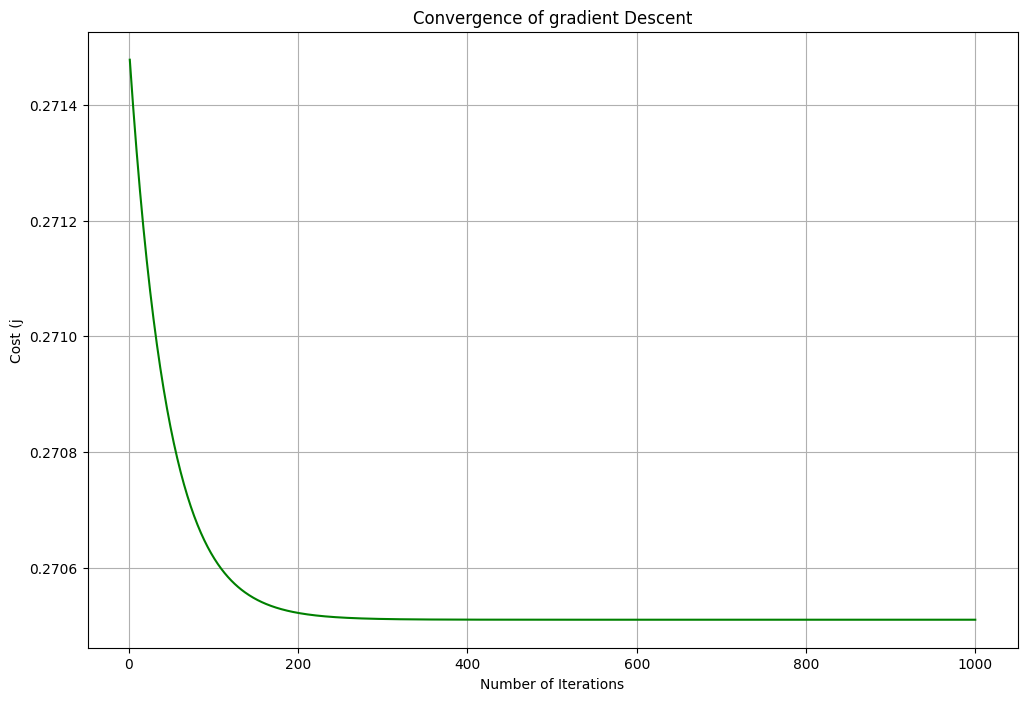

In [11]:
#testing it on testing datasets
y_test = np.array(y_test).reshape(-1,1)
g_test, theta_test_list, cost_test = gradient_descent(x_test, y_test, g,alpha, iterations)
print(cost_test)
print("Final_g test value ", g_test)
plt.plot(range(1, iterations +1), cost_test, color="green")
plt.rcParams["figure.figsize"] = (12,8)
plt.grid()
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (j")
plt.title("Convergence of gradient Descent")
plt.show()